### 适应度函数变化曲线

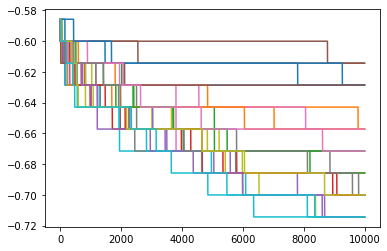

In [1]:
from config import *
import matplotlib.pyplot as plt 
import pandas as pd

num_bats = 3
num_sw = 15
weight = weights1
steps = ga_steps
nums = ga_nums

for pc in pc_hpar:
    for pm in pm_hpar:
        res_path = './results/opti_process_'+str(num_bats)+'_'+str(num_sw)+'_'+weight['name']+'_'+str(steps)+'_'+str(nums)+'_'+str(pc)+'_'+str(pm)+'.csv'
        df_res = pd.read_csv(res_path)
        best_fits = df_res['best_fitness'].values
        plt.plot(best_fits)


### 最优参数组合

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


0.75 0.2
0.8 0.2
0.85 0.15
0.85 0.2
0.9 0.2


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


0.95 0.2


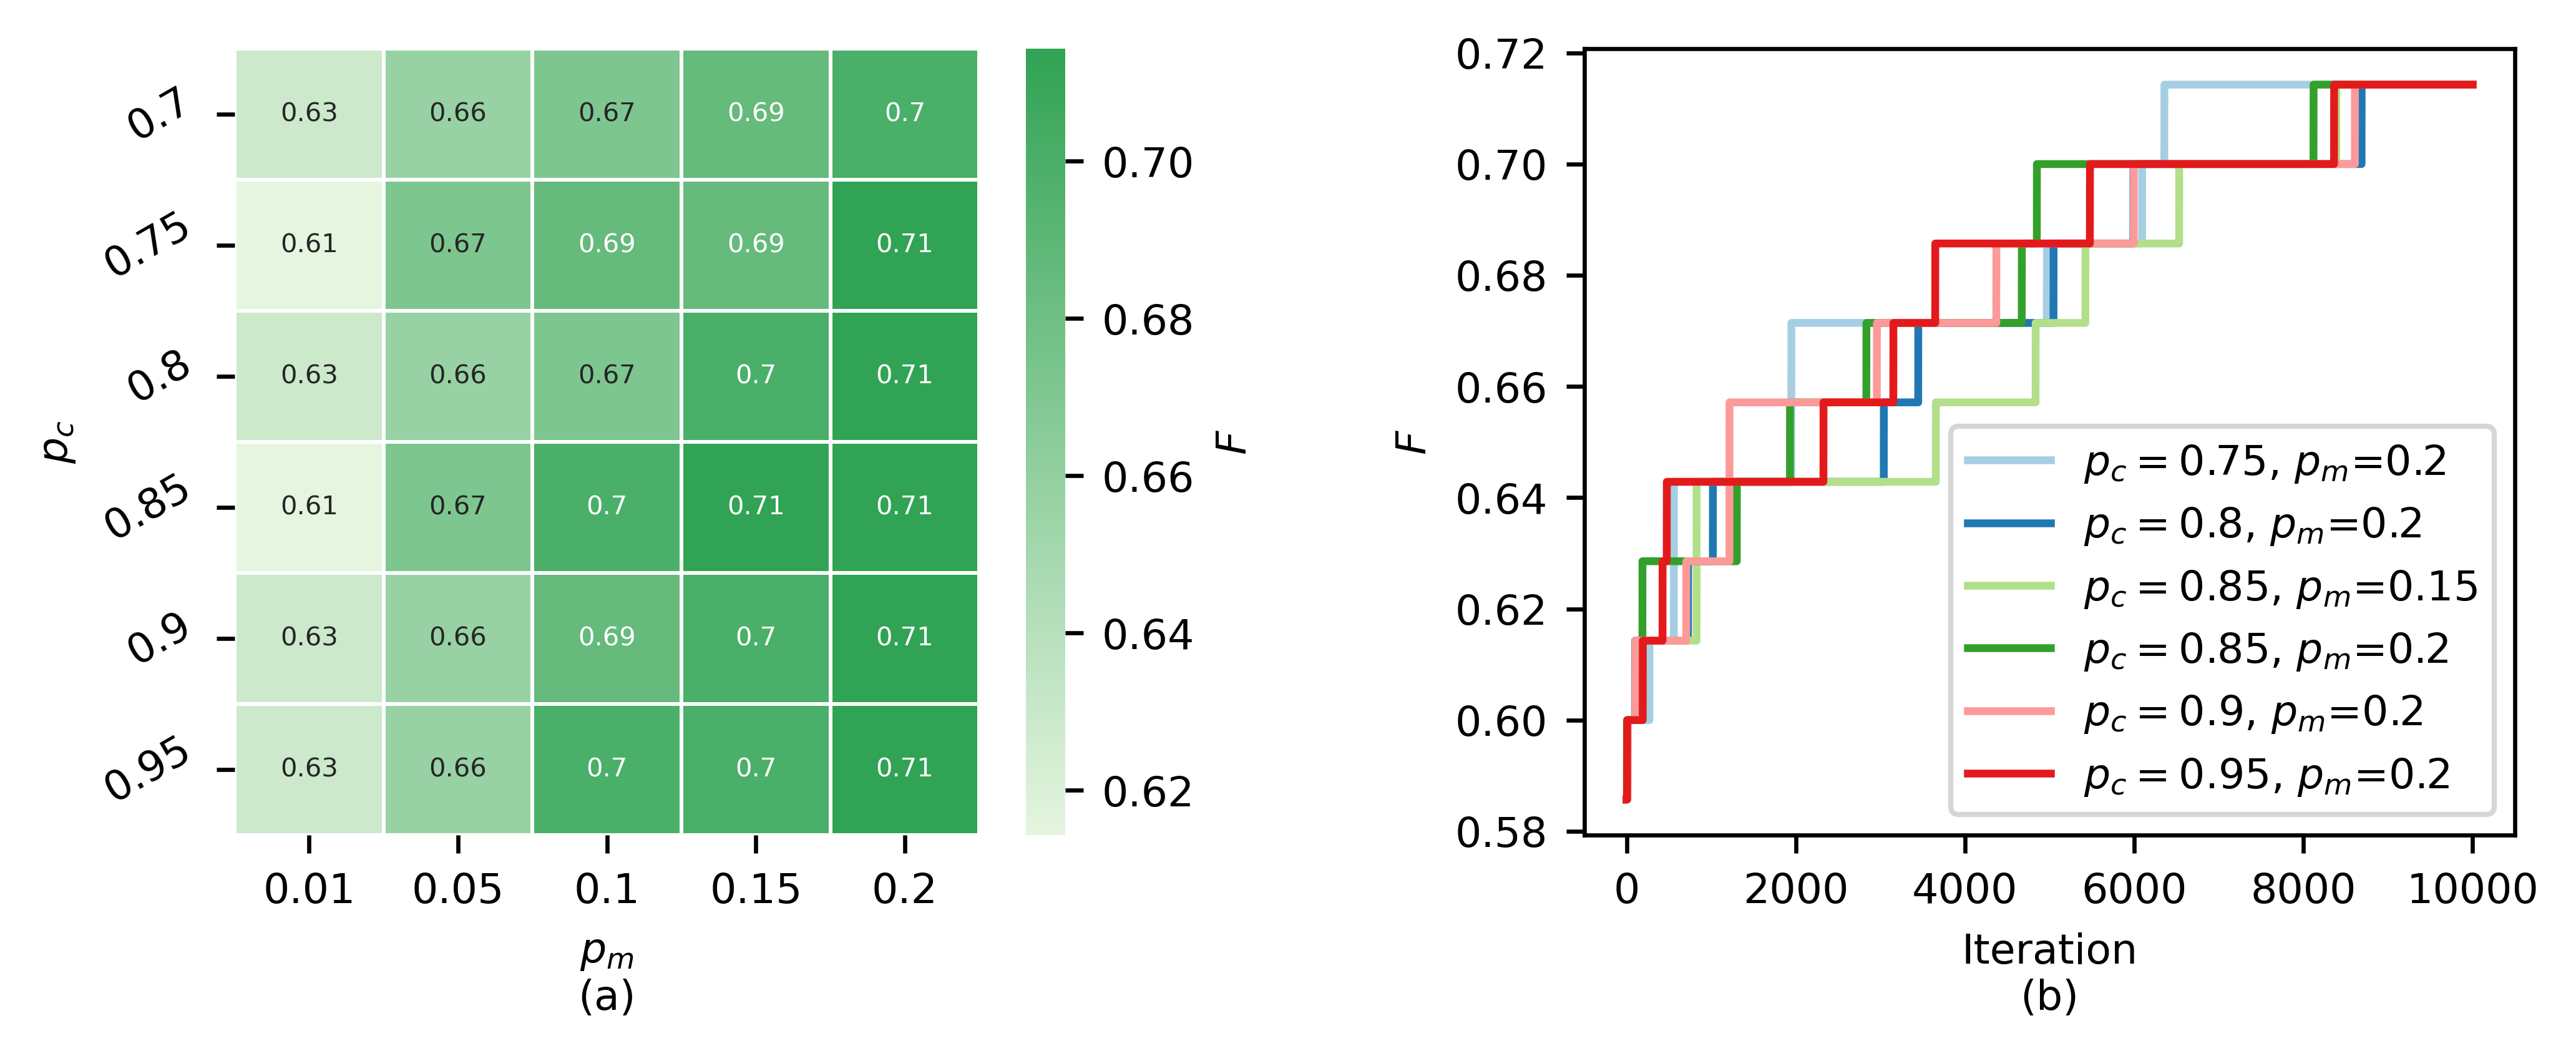

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
from config import *
import seaborn as sns
import matplotlib

plt.style.use(['ieee','no-latex'])
fig,ax = plt.subplots(1,2,figsize=(7,2.8))
colors = ['#e5f5e0','#31a354']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('',colors)
# color_list = ['#ff7f00','#a6cee3','#33a02c',]
color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00']
ls = ['--',':','-',]
ls = ['-','-','-','-','-','-','-','-',]

num_bats = num_bats_hpar
num_sw = num_sws_hpar
weight = weights1
steps = ga_steps
nums = ga_nums

fitness,pcs, pms = [], [], []
for pc in pc_hpar:
    for pm in pm_hpar:
        res_path = './results/opti_process_'+str(num_bats)+'_'+str(num_sw)+'_'+weight['name']+'_'+str(steps)+'_'+str(nums)+'_'+str(pc)+'_'+str(pm)+'.csv'
        df_res = pd.read_csv(res_path)
        fitness.append(-df_res['best_fitness'].values[-1])
        pcs.append(pc)
        pms.append(pm)
df_fit = pd.DataFrame({'fitness':fitness,'pc':pcs,'pm':pms})
min_fit = min(fitness)
max_fit = max(fitness)
fit_res = df_fit.pivot(index='pc', columns='pm', values='fitness')
sns.heatmap(fit_res,ax=ax[0], vmin=min_fit, vmax=max_fit,linewidths=0.5,cmap=cmap,annot=True,
            annot_kws={'fontsize':5},cbar_kws={'label': '$F$'})
ax[0].set_yticklabels(pc_hpar,rotation = 30)
ax[0].set_ylabel('$p_c$')
ax[0].set_xlabel('$p_m$\n(a)')

ind = 0
for pc in pc_hpar:
    for pm in pm_hpar:
        res_path = './results/opti_process_'+str(num_bats)+'_'+str(num_sw)+'_'+weight['name']+'_'+str(steps)+'_'+str(nums)+'_'+str(pc)+'_'+str(pm)+'.csv'
        df_res = pd.read_csv(res_path)
        best_fitness = df_res['best_fitness'].values
        if abs(-best_fitness[-1] - max_fit)<0.001:
            print(pc,pm)
            best_fitness = [-x for x in best_fitness]
            ax[1].plot(best_fitness,ls[ind],label='$p_c=$'+str(pc)+', $p_m$='+str(pm),c=color_list[ind])
            ind = ind + 1
ax[1].legend()

ax[1].set_ylabel('$F$')
ax[1].set_xlabel('Iteration\n(b)')
plt.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.2, wspace=0.45)
plt.savefig('./figs/hyperpar_select.jpg',dpi=300)


## 超参数优化结果

[0, 7] -- 15
w1 -- [0, 7] 15 -0.7142857142857143 -0.7142857142857143 {'f_vol': 1.0, 'f_connect': 1.0, 'f_discon': 1.0, 'f_cur': 0.9999999999999997, 'f_cost': 0.42857142857142855}
[1, 7, 0, 4, 5, 6, 8, 2, 1, 5, 0, 5, 3, 9, 6, 1, 9, 8, 8, 3, 4, 5, 9, 2, 2, 8, 2, 8, 4, 6, 8, 8, 9, 9, 6, 7]


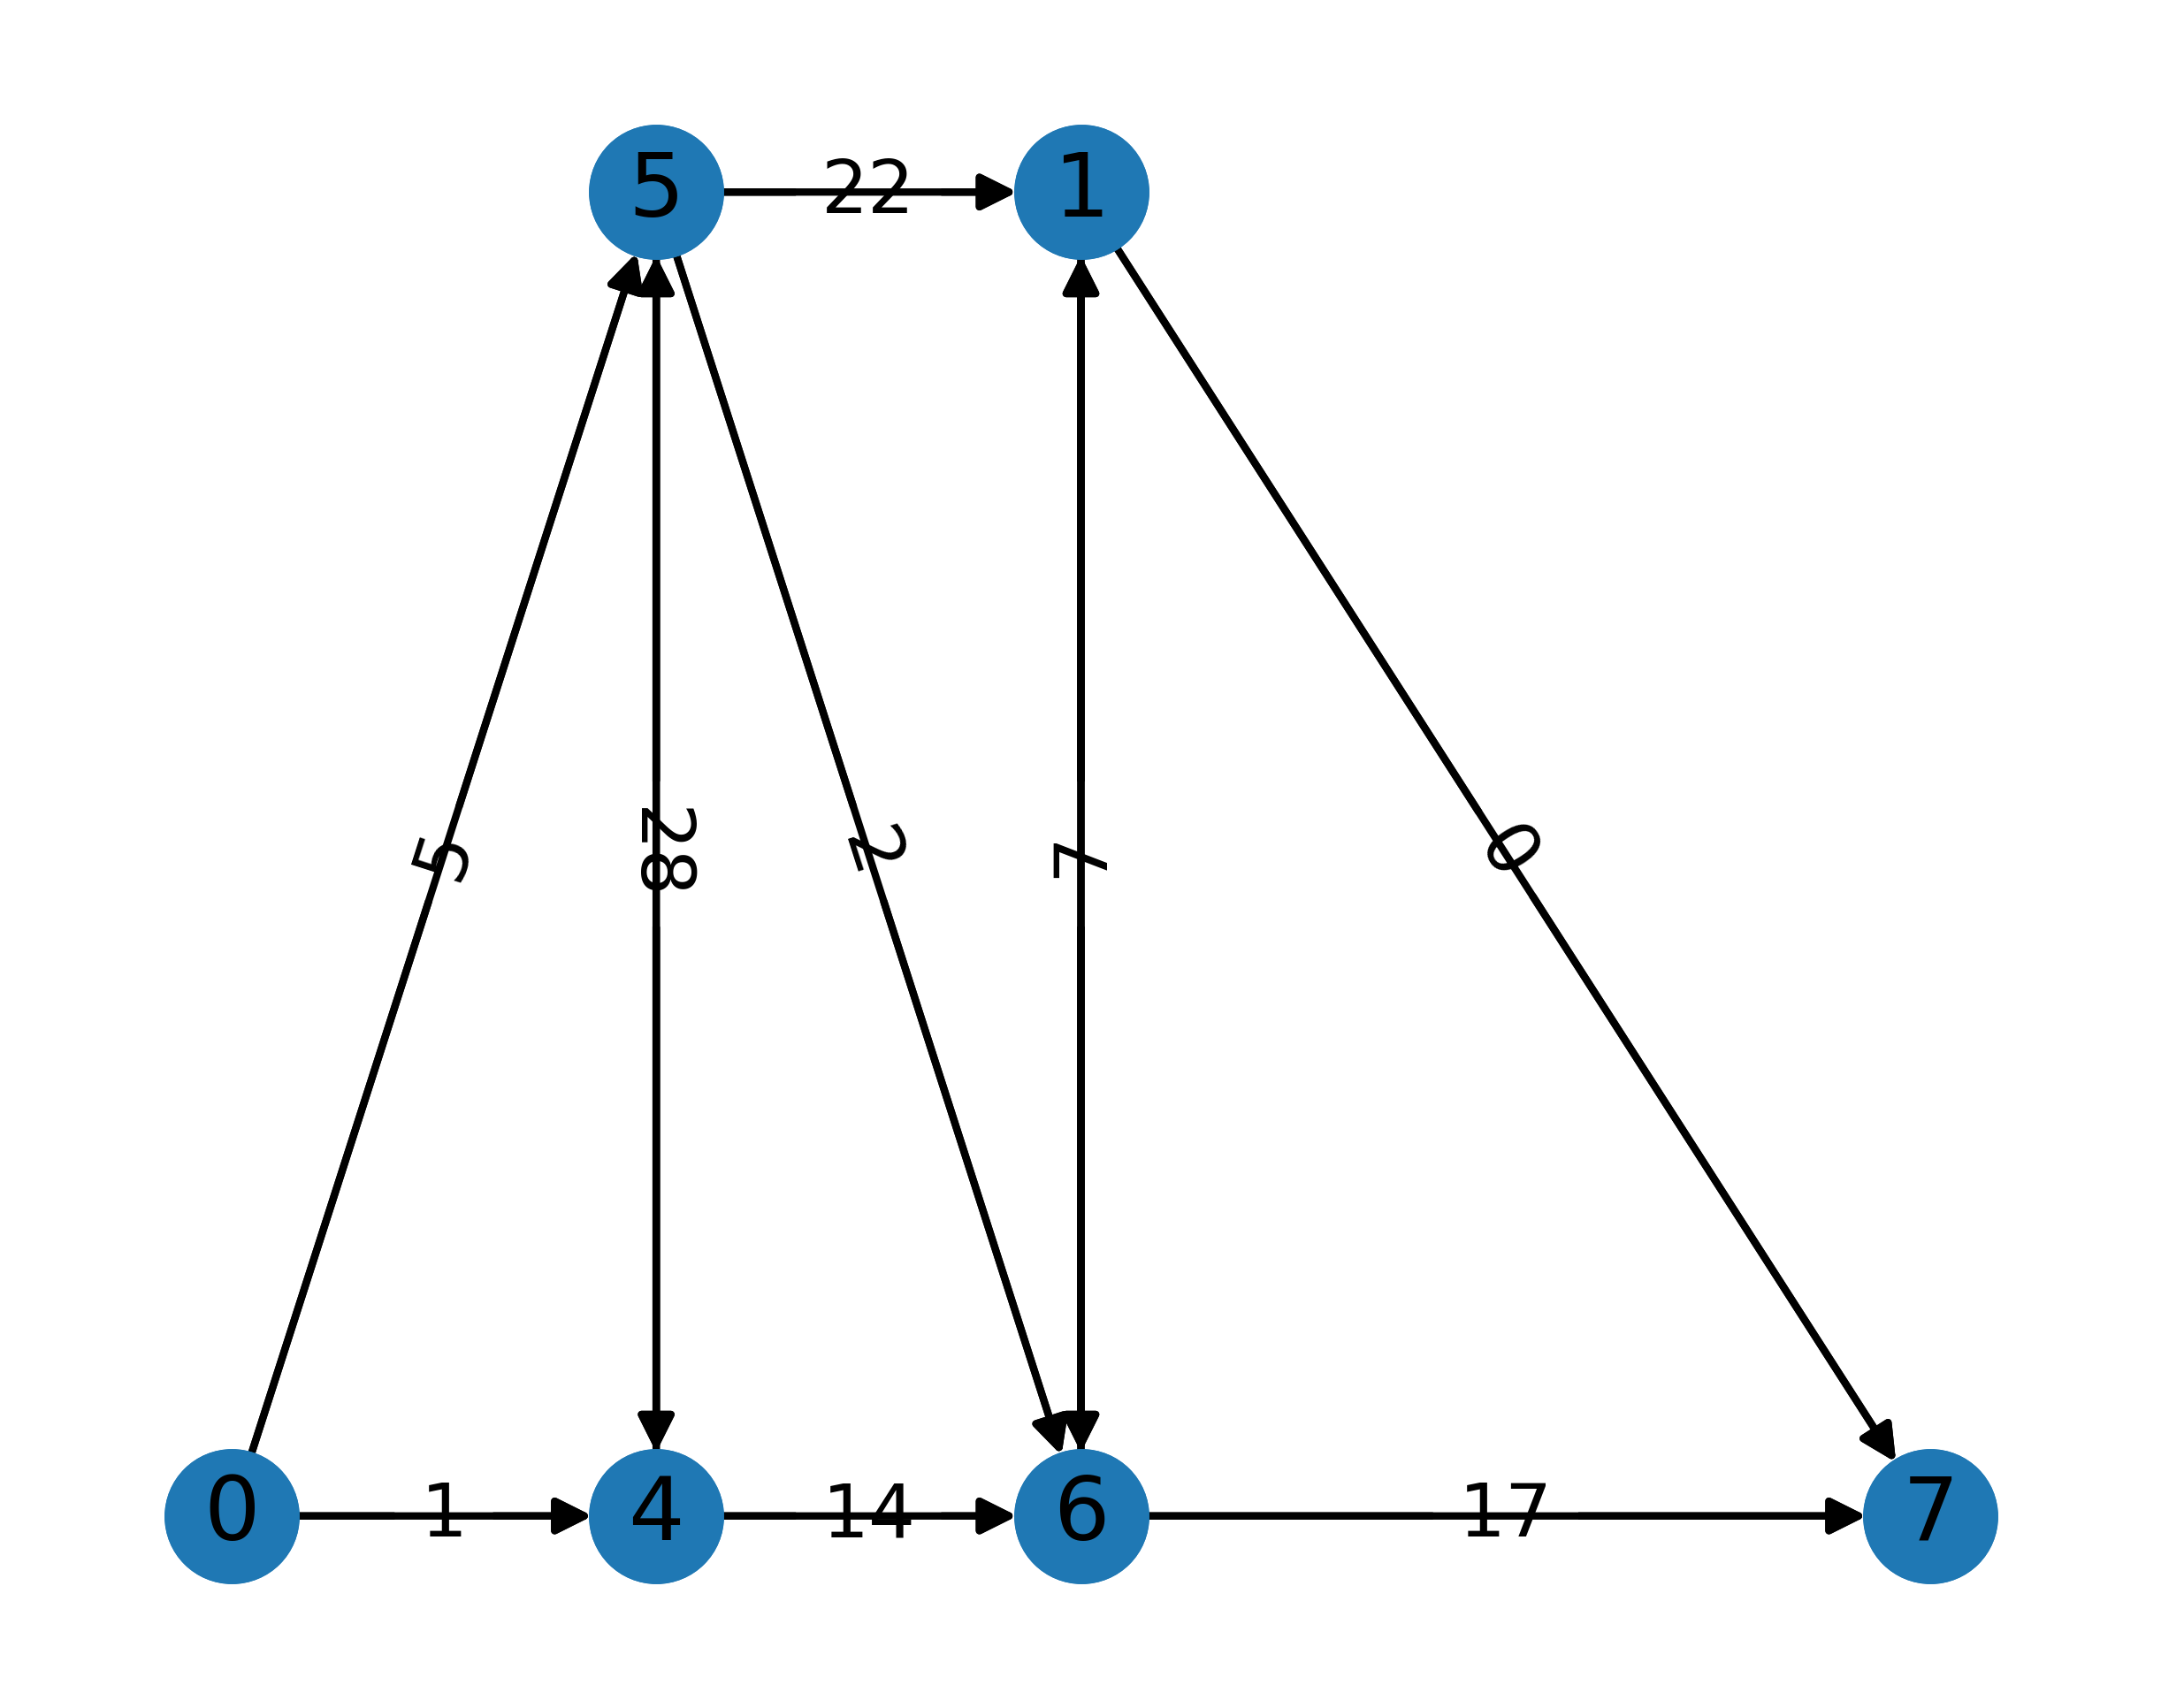

In [2]:
from config import *
import matplotlib.pyplot as plt 
import pandas as pd
from task import *
import seaborn as sns
from mdgraph import MdGraph
import networkx as nx

num_bats = num_bats_hpar
steps = ga_steps
nums = ga_nums
pc = 0.75
pm = 0.2

fig,ax = plt.subplots(1,1,figsize=(5,4))
best_fit, best_chro = select_best_chro2(num_bats,weights1,nums,pc,pm,steps)
num_sws = (len(best_chro) - 2*num_bats)//2
Opti = GA(num_bats,num_sws,weights1)
res = Opti.eva_chro(best_chro,num_bats)
fit =Opti.evaluation([best_chro])
Mdgra = MdGraph(num_bats,num_sws)
G = Mdgra.build(best_chro)
G,terminal = Mdgra.select_circuit(G)
print(terminal,'--',num_sws)
print(weights1['name'],'--',terminal,num_sws,best_fit,fit[0],res)
print(best_chro)
G, pos = Mdgra.build_pos(G,terminal)
nx.draw(G,pos,ax=ax)
edge_labels = nx.get_edge_attributes(G,'edge_label')         
node_labels = nx.get_node_attributes(G,'name')
edge_labels_m = {}
for nodes_name in edge_labels.keys():
    edge_labels_m[(nodes_name[0],nodes_name[1])]=edge_labels[nodes_name]

nx.draw_networkx_labels(G,pos,labels=node_labels,ax=ax)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels_m,ax=ax)
nx.draw(G,pos,with_labels=True,ax=ax)


    